## Importación de las librerías necesarias

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 1. EDA

In [150]:
data = pd.read_csv('./Car details v3.csv')
print(data.shape)
data.head(5)

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Variables numéricas y categóricas

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Descripción de los datos numéricos

In [152]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## Verificación de los valores nulos en el dataset

In [153]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

Cantidad de datos nulos

In [154]:
print("Cantidad de valores faltantes para mileage ",data['mileage'].isnull().sum())
print("Cantidad de valores faltantes para engine ",data['engine'].isnull().sum())
print("Cantidad de valores faltantes para max_power ",data['max_power'].isnull().sum())
print("Cantidad de valores faltantes para torque ",data['torque'].isnull().sum())
print("Cantidad de valores faltantes para seats ",data['seats'].isnull().sum())

Cantidad de valores faltantes para mileage  221
Cantidad de valores faltantes para engine  221
Cantidad de valores faltantes para max_power  215
Cantidad de valores faltantes para torque  222
Cantidad de valores faltantes para seats  221


Dado que los datos faltantes no representan una pérdida significativa de datos, se procede a eliminar los datos nulos

In [155]:
data.dropna(subset=['mileage', 'engine', 'max_power', 'torque', 'seats'],inplace=True)

In [156]:
data.shape

(7906, 13)

Identificación de valores atípicos

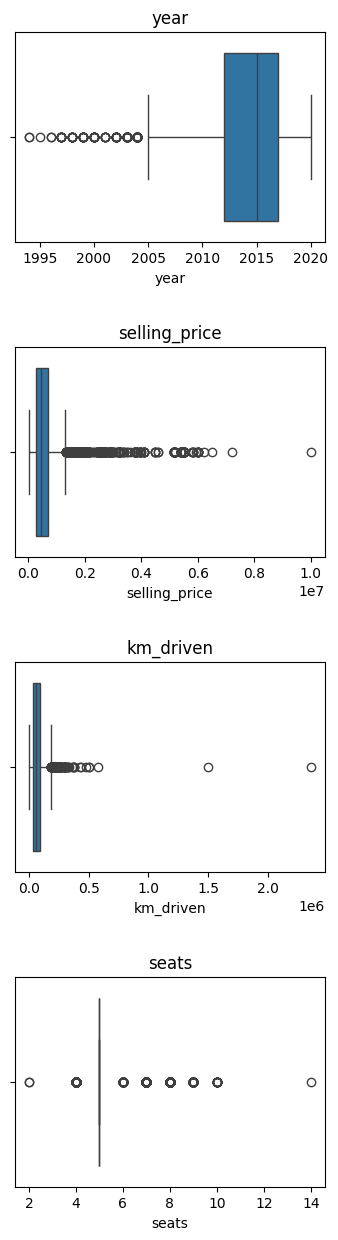

In [157]:
columns_num = ['year','selling_price','km_driven','seats']

fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(4,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

- **year:** pueden haber carros muy viejos para poner a la venta

- **selling_price:** se puede dar el caso de un vehículo con un precio de venta muy elevado

- **km_driven:** en este caso si existen vehículos con kilometrajes muy elevalos por lo cual se han de tratar

- **seats:** existen vehículos que pueden tener espacio para albergar a 14 personas

In [158]:
data.drop(data[data['km_driven']>250000].index,inplace=True)

In [159]:
data.shape

(7861, 13)

Conversión de campos categóricos a numéricos para realizar la correlación

In [160]:
#Eliminación de subcategoría que no es relevante
data.drop(data[data['owner']=='Test Drive Car'].index,inplace=True)

data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
data.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
data.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3}},inplace=True)



C:\Users\frans\AppData\Local\Temp\ipykernel_10084\801829347.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
C:\Users\frans\AppData\Local\Temp\ipykernel_10084\801829347.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
C:\Users\frans\AppData\Local\Temp\ipykernel_10084\801829347.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

## 3. Seleccionar las características más relevantes para entrenar al modelo

- Característica de interés: selling_price

<Axes: xlabel='seats', ylabel='selling_price'>

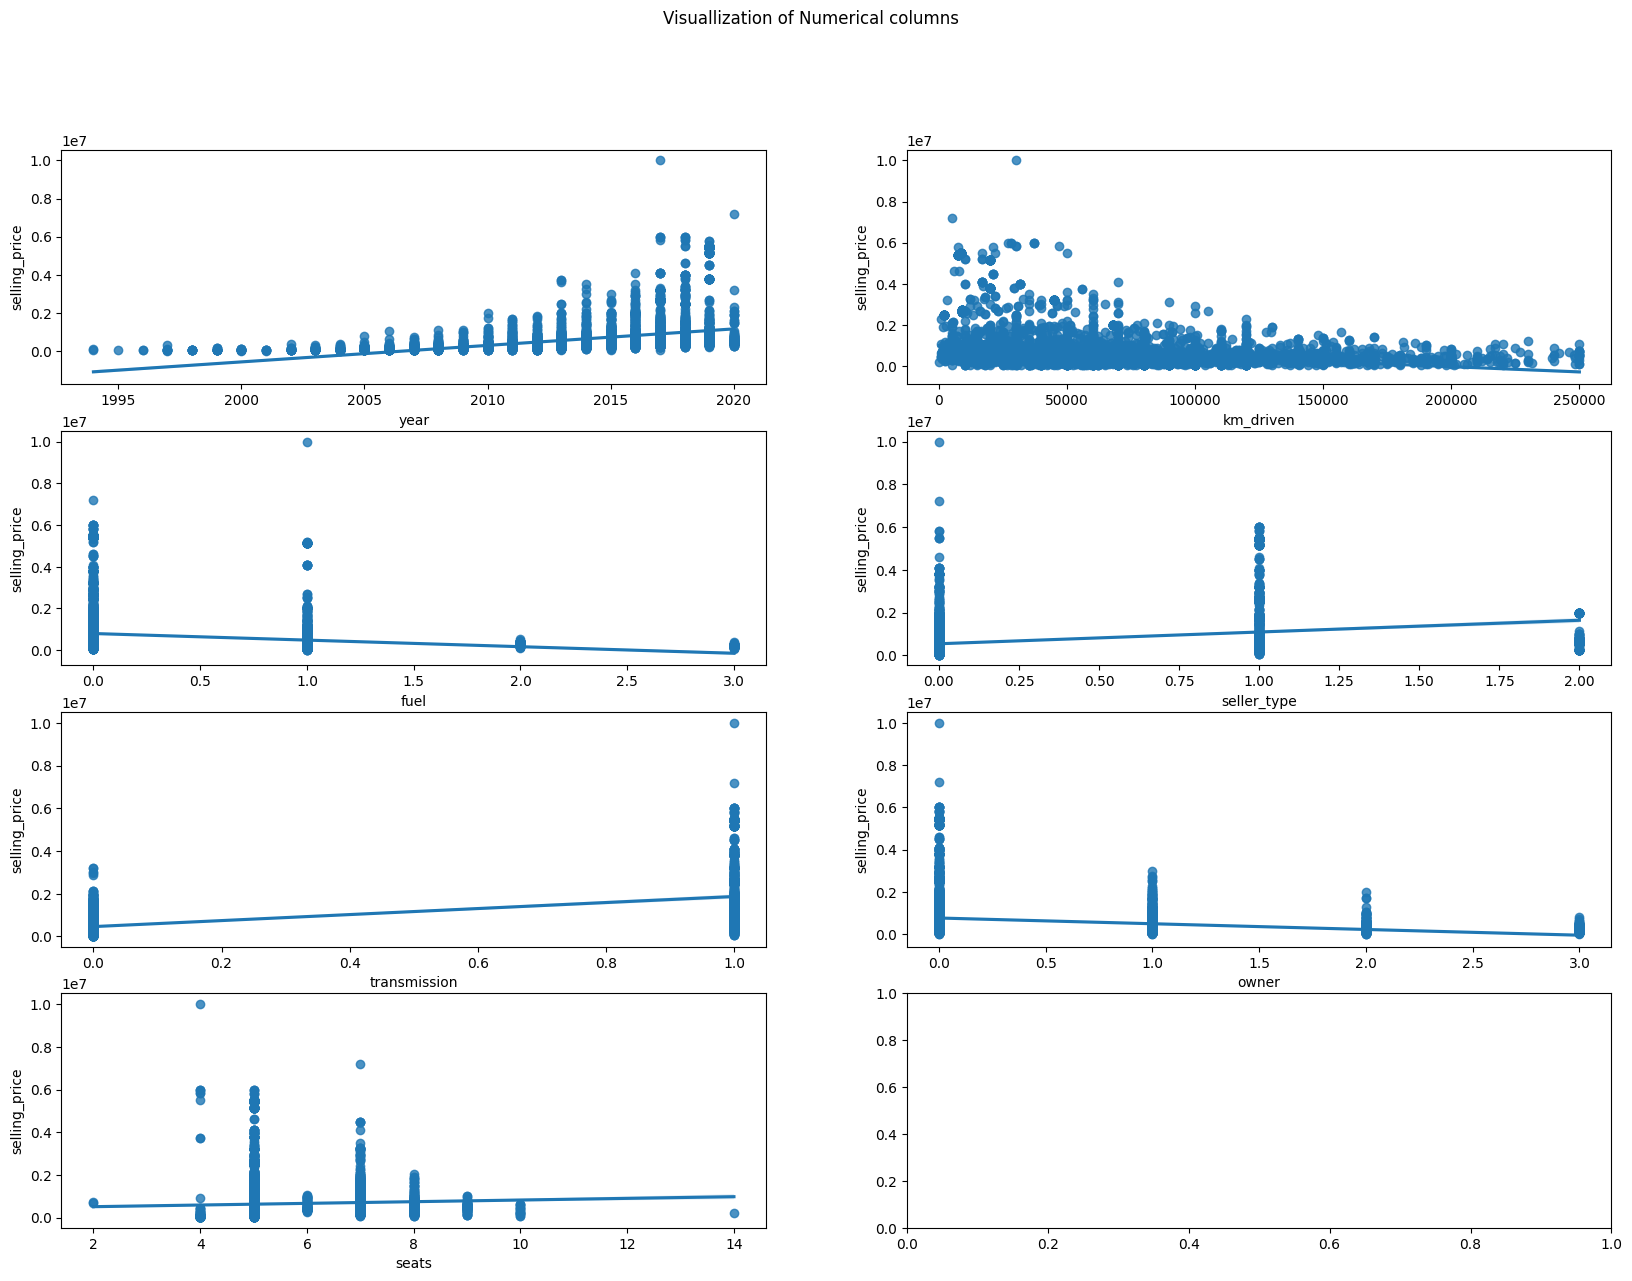

In [161]:
fig, axes = plt.subplots(4, 2, figsize = (20,14))
fig.suptitle('Visuallization of Numerical columns')

sns.regplot(x = 'year', y = 'selling_price', data = data, ax = axes[0,0])
sns.regplot(x = 'km_driven', y = 'selling_price', data = data, ax = axes[0,1])
sns.regplot(x = 'fuel', y = 'selling_price', data = data, ax = axes[1,0])
sns.regplot(x = 'seller_type', y = 'selling_price', data = data, ax = axes[1,1])
sns.regplot(x = 'transmission', y = 'selling_price', data = data, ax = axes[2,0])
sns.regplot(x = 'owner', y = 'selling_price', data = data, ax = axes[2,1])
sns.regplot(x = 'seats', y = 'selling_price', data = data, ax = axes[3,0])

In [162]:
data.dtypes
data.drop(['name','mileage','engine','max_power','torque','max_power','torque'],axis=1,inplace=True)

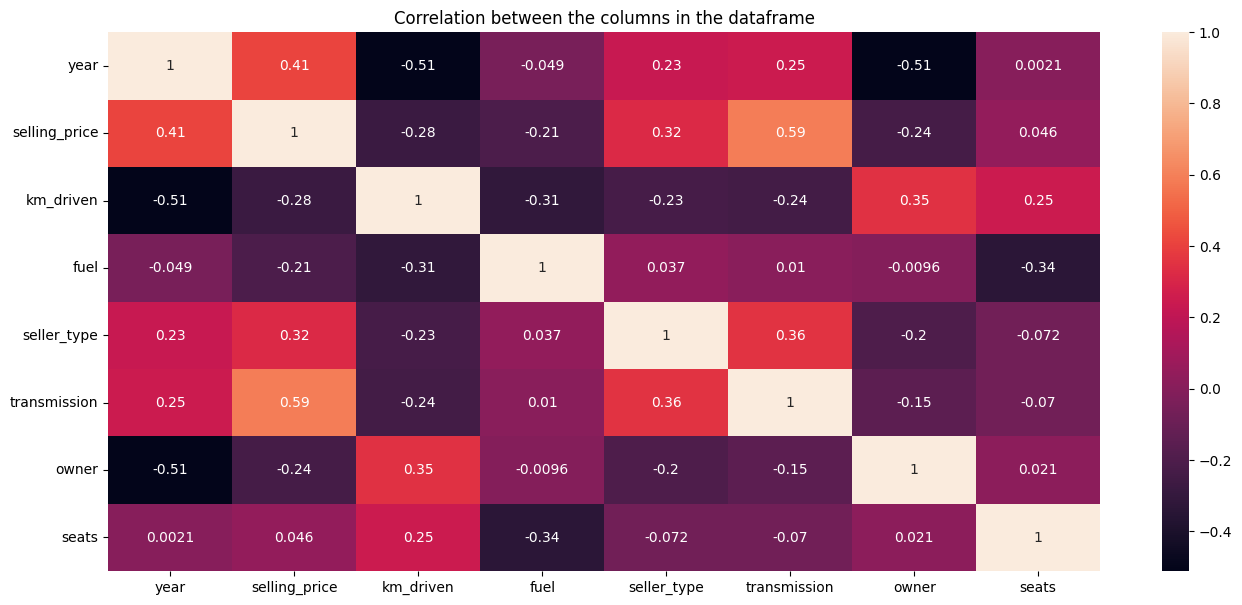

In [163]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation between the columns in the dataframe')
plt.show()

In [164]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
0,2014,450000,145500,0,0,0,0,5.0
1,2014,370000,120000,0,0,0,1,5.0
2,2006,158000,140000,1,0,0,2,5.0
3,2010,225000,127000,0,0,0,0,5.0
4,2007,130000,120000,1,0,0,0,5.0


Variables con correlación considerable: **year** y **transmission**

## 4. Dividir el dataset en test y train para evaluar correctamente el modelo

In [165]:
X = data.drop('selling_price',axis=1) #datos de train sin columna objetivo
Y = data['selling_price'] #data de la columna sellin_price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=2)


In [166]:
print(Y_test)

6449    150000
92      351000
955     800000
2416    950000
1223    395000
         ...  
2287    320000
7623    260000
3116    975000
6127    385000
7820    900000
Name: selling_price, Length: 1964, dtype: int64


## 5. Entrenar el modelo configurando los hiperparámetros

In [167]:
lin_reg_model = LinearRegression()

In [168]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [169]:
predictions = lin_reg_model.predict(X_train)

In [170]:
print(predictions.__len__())

5892


## 6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc

In [171]:
error_score = metrics.r2_score(Y_train, predictions)
mse = metrics.mean_squared_error(Y_train, predictions)
mae = metrics.mean_absolute_error(Y_train, predictions)

print("R squared Error : ", error_score)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R squared Error :  0.4795806275378217
Mean Squared Error (MSE): 346809814187.7228
Mean Absolute Error (MAE): 313522.93702288705


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

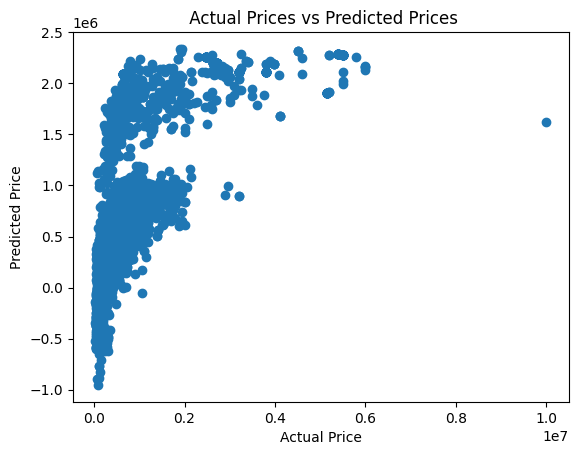

In [172]:
plt.scatter(Y_train, predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

- R-squared (Coeficiente de Determinación): Un valor de R-cuadrado de aproximadamente 0.48 significa que alrededor del 48% de la variabilidad en la variable de respuesta puede ser explicada por las variables independientes incluidas en el modelo.

- Error Cuadrático Medio (MSE): Un MSE tan alto (346809814187.7228) sugiere que el modelo tiene un alto error en sus predicciones y que las predicciones están bastante alejadas de los valores reales. Sería deseable reducir este valor para mejorar el rendimiento del modelo.

- Error Absoluto Medio (MAE): Un valor tan alto (313522.93702288705) indica que las predicciones del modelo aún están bastante alejadas de los valores reales.

- Como conclusión, es necesario ajustar el modelo.